In [1]:
from cascading_defaults.simulation.simulation import Simulation
from cascading_defaults.simulation.strategies import available_strategies, LargestCreditorFirst,\
    LargestCreditorLast, EisenbergNoe
from cascading_defaults.analysis.simulation_analysis import flow_over_time
from scipy import sparse
import numpy as np
import os

In [2]:
label_of_network='random_network'
np.random.seed(0)
L = sparse.random(100,100, density=0.02, format='csr')
directory = os.path.join(os.getcwd(), 'transactionnetworks/', label_of_network)
try:
    os.makedirs(directory)
except FileExistsError:
    pass
path = os.path.join(directory, 'L.npz')
sparse.save_npz(path, L)

In [3]:
# Simulation parameters
max_iter = 100
save = True
verbose = 0
rtol = 5e-5

In [4]:
from itertools import product

build_reserves_list = [True]
pay_remaining_money_list = [False, True]
has_exogenous_list = [False]  # Exo=True does not work currently
strategy_classes = available_strategies

strategies = []

iterator = product(strategy_classes, build_reserves_list, pay_remaining_money_list, has_exogenous_list)

for strategy_class, build_reserves, pay_remaining_money, has_exogenous in iterator:
    if strategy_class == EisenbergNoe and not pay_remaining_money:
        print(f'Skipping EisenbergNoe with pay_remaining_money=False.')
        continue
    strategy = strategy_class(build_reserves=build_reserves, pay_remaining_money=pay_remaining_money,
                              has_exogenous=has_exogenous)
    strategies.append(strategy)
    
simulations = {}

for strategy in strategies:
    simulation = Simulation(strategy, L, label_of_run=f'{max_iter}_run', start_reserves=0,
                            label_of_network=label_of_network, force_update_L=True)
    simulations[strategy.label] = simulation

Skipping EisenbergNoe with pay_remaining_money=False.
Setting up Simulation for LargestCreditorFirstR-NoExo_100_run.
Creating L_sorted_descending.
sorting L
Done sorting L
Setting up Simulation for LargestCreditorFirstXR-NoExo_100_run.
Creating L_sorted_descending.
sorting L
Done sorting L
Setting up Simulation for LargestCreditorLastR-NoExo_100_run.
Creating L_sorted_ascending.
sorting L
Done sorting L
Setting up Simulation for LargestCreditorLastXR-NoExo_100_run.
Creating L_sorted_ascending.
sorting L
Done sorting L
Setting up Simulation for EisenbergNoeXR-NoExo_100_run.
Creating L_EisenbergNoe.


/Users/camilledevalk/Code/cascading-defaults/venv/lib/python3.8/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [5]:
# Sequential (when max_iter < 1000 this is probably faster)
for strategy in strategies:
    simulation = simulations[strategy.label]
    simulation.run(max_iter=max_iter, save=save, verbose=verbose, rtol=rtol)

Running LargestCreditorFirstR-NoExo_100_run.
Saving to ~/simulations/random_network/100_run/LargestCreditorFirstR-NoExo/
Done with LargestCreditorFirstR-NoExo_100_run.
Running LargestCreditorFirstXR-NoExo_100_run.
Saving to ~/simulations/random_network/100_run/LargestCreditorFirstXR-NoExo/
Done with LargestCreditorFirstXR-NoExo_100_run.
Running LargestCreditorLastR-NoExo_100_run.
Saving to ~/simulations/random_network/100_run/LargestCreditorLastR-NoExo/
Done with LargestCreditorLastR-NoExo_100_run.
Running LargestCreditorLastXR-NoExo_100_run.
Saving to ~/simulations/random_network/100_run/LargestCreditorLastXR-NoExo/
Done with LargestCreditorLastXR-NoExo_100_run.
Running EisenbergNoeXR-NoExo_100_run.
Saving to ~/simulations/random_network/100_run/EisenbergNoeXR-NoExo/
Done with EisenbergNoeXR-NoExo_100_run.


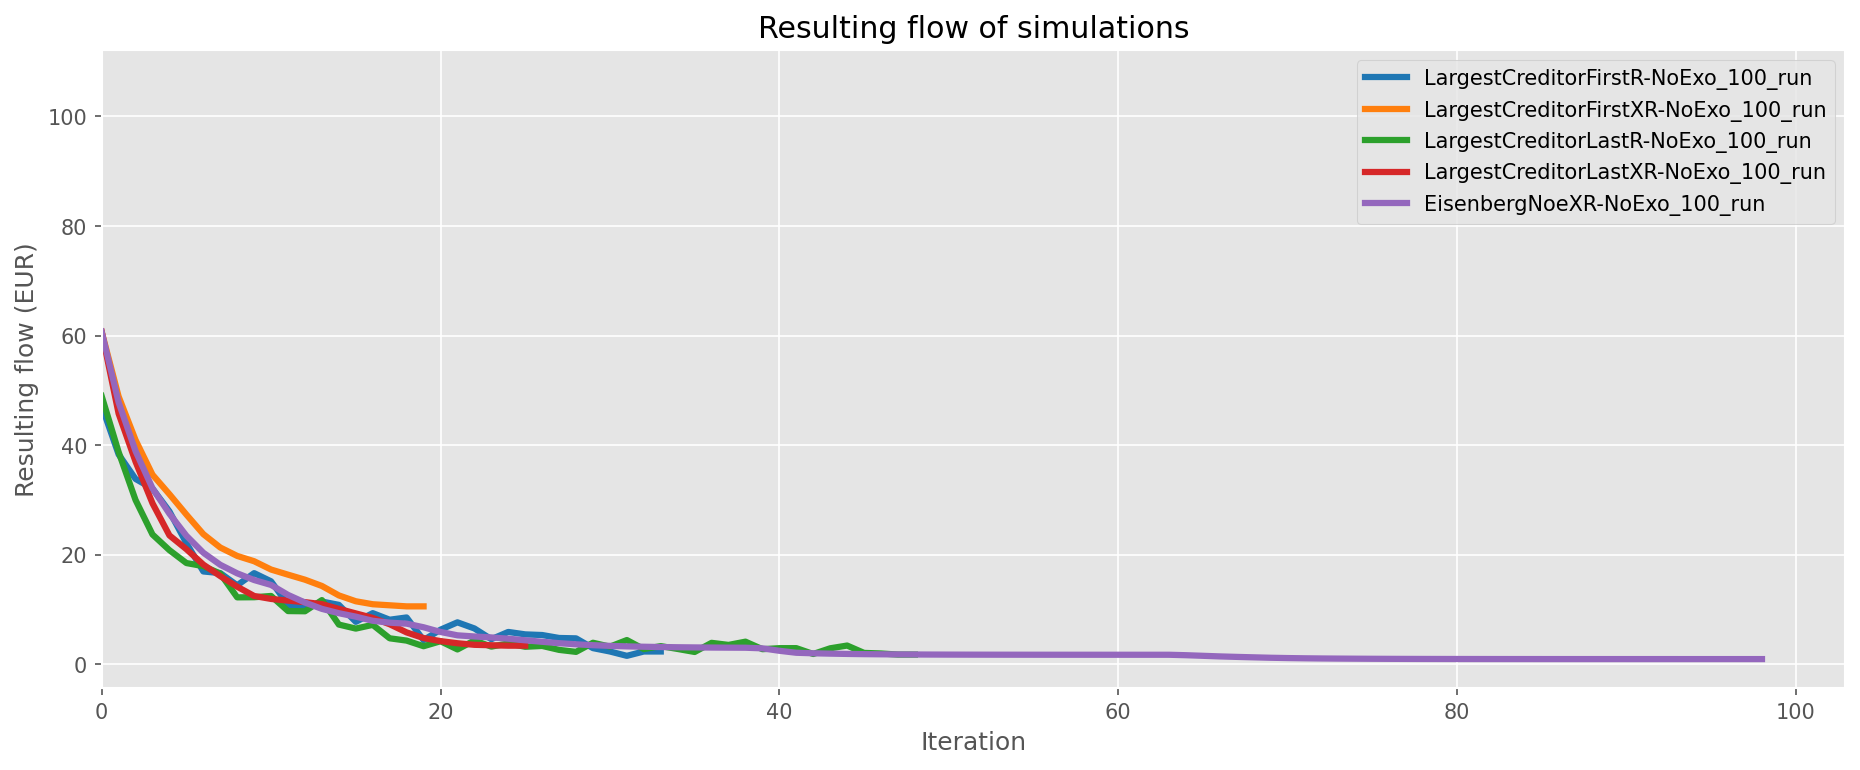

In [6]:
flow_over_time(simulations, absolute_relative='absolute')